# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   https://www.kaggle.com/datasets/ankushpanday2/indian-kids-screentime-2025/data



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [28]:
#Type your code here
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [29]:
# Meload dataset
data = pd.read_csv("../Indian_Kids_Screen_Time.csv")

# Melihat 5 data awal
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [30]:
# Mengecek tipe data yang ada di dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


Jika diliat semua jumlah data konsisten berjumla 9712 row, kecuali column "Health_impact" yang berjumlah  6494 row. Dari sini mungkin ada data value yang missing.

In [31]:
# melihat data yang unik 
data.nunique()


Age                                   11
Gender                                 2
Avg_Daily_Screen_Time_hr             899
Primary_Device                         4
Exceeded_Recommended_Limit             2
Educational_to_Recreational_Ratio     31
Health_Impacts                        15
Urban_or_Rural                         2
dtype: int64

In [32]:
# Melihat data yang terindikasi missing value
data.isnull().sum()

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

dapat diliat ada data yang hilang atau missing value di column "Health_impact" yang berjumlah 3218.

In [33]:
# Melihat data yang terindakasi duplikat
print("Data yang terindakasi duplikat:", data.duplicated().sum())

# Melihat deskripsi data Number
data.describe()

Data yang terindakasi duplikat: 44


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


data yang terindikasi duplikat berjumlah 44 data.

C:\Users\asus\AppData\Local\Temp\ipykernel_15892\1302518475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x="Gender", palette={"Male": "blue", "Female": "red"})


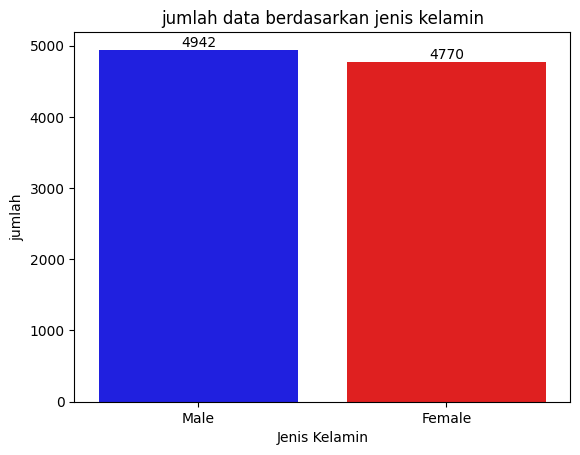

In [34]:
# melihat perbandingan pada data Gender
ax = sns.countplot(data=data, x="Gender", palette={"Male": "blue", "Female": "red"})

for container in ax.containers:
    ax.bar_label(container)

plt.title("jumlah data berdasarkan jenis kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("jumlah")
plt.show()

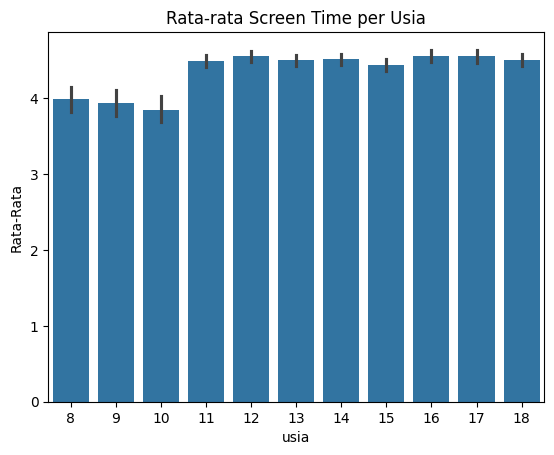

In [35]:
# melihat rata-rata rata penggunaan screen time berdasarakan usia
sns.barplot(data=data, x="Age", y="Avg_Daily_Screen_Time_hr", estimator="mean")
plt.title("Rata-rata Screen Time per Usia")
plt.ylabel("Rata-Rata")
plt.xlabel("usia")
plt.show()

insight yang kita dapat adalah dari umur 8-10 tahun rata rata penggunaan screen time berkisar 4 jam, dan dari umur 11-18 tahun rata rata penggunaan screen time berkisar lebih dari 4. Jadi, ada kemungkinan dari umur 11 tahun keatas penjagaan screen time tidak lagi terlalu ketat.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [36]:
# Menghapus data missing dan duplikat
data_clean = data.dropna().drop_duplicates()
print("jumalah data duplikat : ", data_clean.duplicated().sum())
print("Jumlah data hilang    :")
print(data_clean.isnull().sum())

jumalah data duplikat :  0
Jumlah data hilang    :
Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64


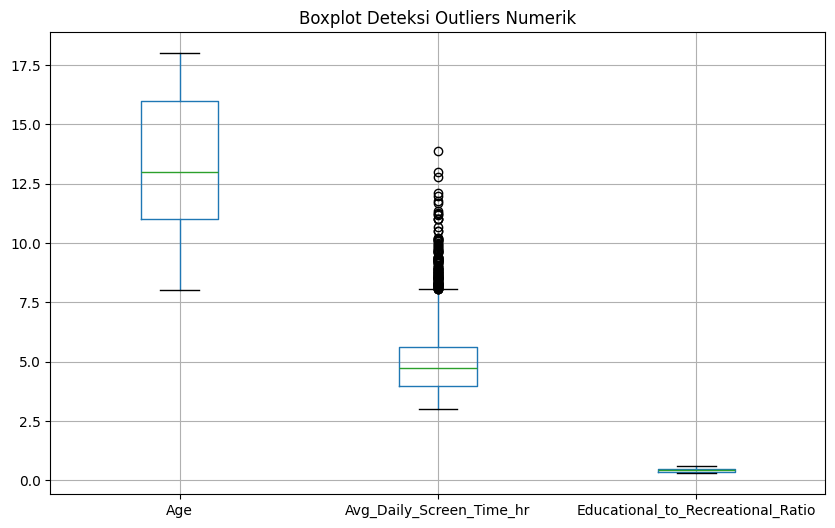

In [37]:
# Mengambil kolom numerik
num_cols = data_clean.select_dtypes(include=['int64', 'float64']).columns  

# Deteksi outliers menggunakan boxplot
plt.figure(figsize=(10, 6))
data_clean[num_cols].boxplot()
plt.title("Boxplot Deteksi Outliers Numerik")
plt.show()

In [38]:
# Hitung Q1, Q3, dan IQR
Q1 = data_clean['Avg_Daily_Screen_Time_hr'].quantile(0.25)
Q3 = data_clean['Avg_Daily_Screen_Time_hr'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Buang outlier
data_no_outliers = data_clean[(data_clean['Avg_Daily_Screen_Time_hr'] >= lower_bound) & 
                       (data_clean['Avg_Daily_Screen_Time_hr'] <= upper_bound)].copy()

print("Jumlah data sebelum:", len(data_clean))
print("Jumlah data setelah:", len(data_no_outliers))

Jumlah data sebelum: 6488
Jumlah data setelah: 6354


In [39]:
# Encoding data kategorikal menggunakan LabelEncoder

categorical_column =[
    "Gender",
    "Urban_or_Rural",
    "Primary_Device",
    "Exceeded_Recommended_Limit"
]

le = LabelEncoder()

for col in categorical_column:
    data_no_outliers[col] = le.fit_transform(data_no_outliers[col].astype(str))

In [40]:
# Mengatasi column health impact yang mengandung multi label dengan memisahnya jadi perkolom
multi_label_data = data_no_outliers['Health_Impacts'].str.get_dummies(sep=', ')
data_no_outliers = data_no_outliers.drop(["Health_Impacts"], axis=1)

data_ready = pd.concat([data_no_outliers, multi_label_data], axis=1)


In [41]:
data_ready.to_csv("data_clean.csv", index=False)